In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [6]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.features.build_features import PCA, KMeans

In [4]:
datafile = "../data/processed/UTK-peers_processed.csv"
df = pd.read_csv(datafile)

In [21]:
df.head()

,Name,IPEDS#,% Blk Total Students,% Hisp Total Students,2017 US News top 65,Total Enroll,% Grad Enroll,Six-year graduation rate,ACT/ SAT Avg,Fresh Admit Rate,...,Student Services Expenditures,Endowment Figure,Endowment per Student FTE,Total Faculty.1,Total Tenure /Tenure-Track Facutly.1,Carm R1_1,Carm R1_2,2014 Med School_pre clin,2014 Med School_x,Vet School_True
0,Univ. of Tennessee - Knoxville,221759.0,6.625965,3.404561,46,27845,21.483211,70,27.0,76.295299,...,30587.112868,782734414,30587.112868,1526,1117,1,0,0,0,1
1,Univ. of Georgia,139959.0,8.048713,4.732909,18,36130,23.755882,85,27.5,52.877649,...,27830.636107,939024216,27830.636107,1918,1606,1,0,0,0,1
2,Purdue Univ.,243780.0,2.994663,4.128780,20,40472,24.491006,75,26.5,58.969601,...,66375.581533,2445541926,66375.581533,1783,1700,1,0,0,0,1
3,Texas A&M Univ.,228723.0,3.203109,19.193581,27,63813,23.277389,79,26.0,66.642580,...,180613.450122,10521034492,180613.450122,2983,1995,1,0,1,0,1
4,Michigan State Univ.,171100.0,6.591080,4.020737,33,50538,22.547390,77,25.5,66.280453,...,55180.107179,2549137018,55180.107179,2616,1811,1,0,0,1,1


In [5]:
df_num = df.select_dtypes(exclude=['object'])

In [7]:
pca3 = PCA(variance=0.95)

In [8]:
pca3.fit(df_num.values)

In [9]:
col_names = [f"PC{_}" for _ in range(pca3.explained_variance_.shape[0])]
df_pca = pd.DataFrame(pca3.transform(df_num.values), columns=col_names)

In [10]:
df_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-3.517890,-0.486346,1.083668,-0.637800,0.399153,-0.414000,0.446508,-0.910376,0.397498,-1.131975,0.457703,-1.231212,0.289752,-0.371606,0.256517,-0.838970,0.175840
1,-0.500982,0.452895,-1.356540,-1.842639,-1.455565,-0.234472,-0.413945,-1.714717,-0.186934,-0.592882,0.313359,0.415553,-0.265880,-0.399637,0.135276,-0.853047,-1.191960
2,1.397090,0.776138,-0.127559,-2.291735,-0.151931,0.861892,1.974737,-0.487323,-0.574231,-0.739704,1.218988,-0.421877,-1.422327,-1.348678,1.371906,-0.611726,-0.037752
3,9.222059,5.857763,-0.861802,-5.668613,3.488236,-5.499119,0.767580,2.305090,1.037392,-1.957491,0.274788,0.435926,-0.591103,0.887408,-0.667914,-0.170116,0.734678
4,2.951906,2.935468,-0.127834,-0.776416,0.711327,1.030757,0.047915,-2.105841,-0.767948,0.207164,-0.389787,0.404698,-0.481603,-0.042701,0.370458,0.072707,0.841476


In [11]:
km_pca = KMeans()

In [26]:
km_pca.fit(df_pca.values, k=4, num_starts=50)

In [27]:
# Code to label points obtained from 
# https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), 
                fontdict={'size': 10})

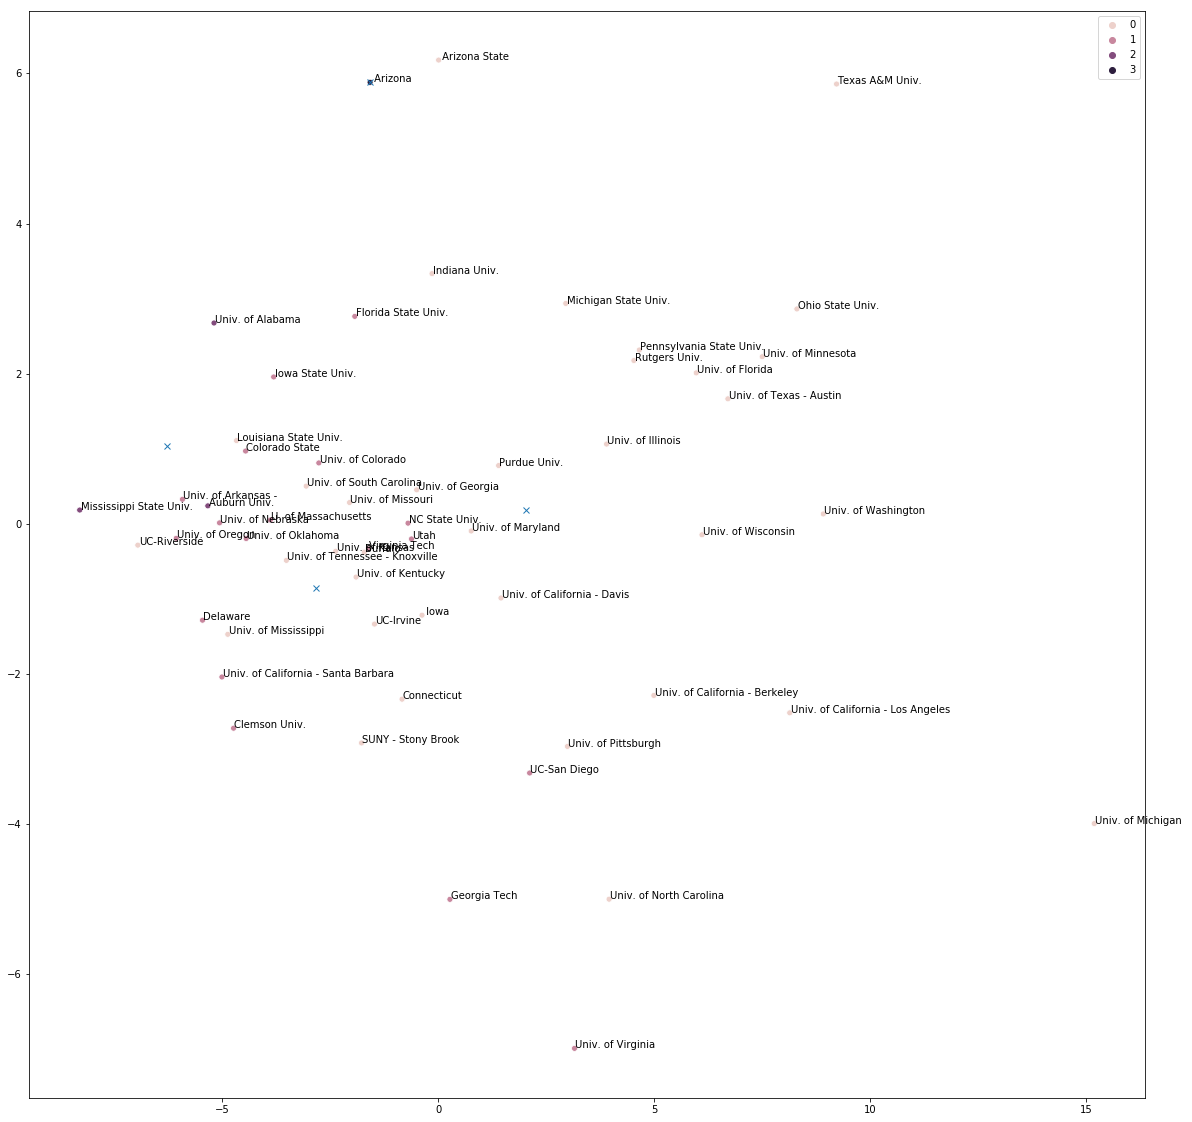

In [28]:
f, ax = plt.subplots(figsize=(20,20))
km_pca.plot_km(df_pca.values)
label_point(df_pca["PC0"], df_pca["PC1"], df.Name, plt.gca())